In [1]:
# Berikut import library umum dan wajib dipakai mengenai data analisis
import pandas as pd              # ---> memasukan library pandas pengelolaan data pada python https://pandas.pydata.org/
import numpy as np               # ---> memasukan library numpy perhitungan numerik https://numpy.org/
import seaborn as sns            # ---> memasukan library seaborn visualisasi https://seaborn.pydata.org/
import matplotlib.pyplot as plt  # ---> memasukan library metplotlib visualisasi https://matplotlib.org/
from scipy import stats

In [2]:
data = pd.read_excel('Data Perhitungan Mekanika Batuan 2.0.xlsx', sheet_name=0)  # ---> File data harus berada di folder yang sama dengan notebook
                                        # ---> Gunakan (. . ., sheet_name=0) jika ada mau menggunakan sheet tertentu
data

,Joint_ID,Joint_Set,Scanline_Length(m),Strike_Discontinuity,Dip_Discontinuity,Dip_Direction_Discontinuity,Intact_Rock_Strength,UCS(MPa)_Strength,BN_Strength,RQD_Value(%),...,BN_F2,Dip_J-S_F3,BN_F3,BN_F4,SMR,SMR_Class,SMR_Category,SMR_Laubscher,SMR_Hall,SMR_Orr
0,1A,A,0.60,173,78,263,R3,25-50,4,99.94432,...,1.0,151,-25,0,68.25,II,Good,65,71.80,78.683314
1,2A,A,2.10,187,85,277,R3,25-50,4,99.94432,...,1.0,158,-25,0,72.25,II,Good,65,74.40,80.575667
2,3B,B,2.80,150,70,240,R3,25-50,4,99.94432,...,1.0,143,-25,0,76.25,II,Good,65,77.00,82.370932
3,4C,C,3.20,215,70,305,R3,25-50,4,99.94432,...,1.0,143,-25,0,73.25,II,Good,65,75.05,81.033190
4,5C,C,3.60,210,72,300,R3,25-50,4,99.94432,...,1.0,145,-25,0,73.25,II,Good,65,75.05,81.033190
5,6C,C,4.90,210,72,300,R3,25-50,4,99.94432,...,1.0,145,-25,0,78.25,II,Good,65,78.30,83.235174
6,7A,A,6.60,190,85,280,R3,25-50,4,99.94432,...,1.0,158,-25,0,70.25,II,Good,65,73.10,79.642278
7,8A,A,8.40,185,80,275,R3,25-50,4,99.94432,...,1.0,153,-25,0,78.25,II,Good,65,78.30,83.235174
8,9D,D,8.65,125,22,215,R3,25-50,4,99.94432,...,0.4,93,0,0,68.00,II,Good,65,69.20,76.682770
9,10D,D,9.50,125,22,215,R3,25-50,4,99.94432,...,0.4,95,0,0,72.00,II,Good,65,71.80,78.683314


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Joint_ID                            13 non-null     object 
 1   Joint_Set                           13 non-null     object 
 2   Scanline_Length(m)                  13 non-null     float64
 3   Strike_Discontinuity                13 non-null     int64  
 4   Dip_Discontinuity                   13 non-null     int64  
 5   Dip_Direction_Discontinuity         13 non-null     int64  
 6   Intact_Rock_Strength                13 non-null     object 
 7   UCS(MPa)_Strength                   13 non-null     object 
 8   BN_Strength                         13 non-null     int64  
 9   RQD_Value(%)                        13 non-null     float64
 10  BN_RQD                              13 non-null     int64  
 11  Joint_Spacing_Value(m)              13 non-null

## Basic Stats

In [4]:
data.describe()

,Scanline_Length(m),Strike_Discontinuity,Dip_Discontinuity,Dip_Direction_Discontinuity,BN_Strength,RQD_Value(%),BN_RQD,Joint_Spacing_Value(m),BN_Joint_Spacing,Joint_Length_Value(m),...,Strike_J-S_F1,BN_F1,BN_F2,Dip_J-S_F3,BN_F3,BN_F4,SMR,SMR_Laubscher,SMR_Hall,SMR_Orr
count,13.000000,13.000000,13.000000,13.000000,13.0,13.00000,13.0,13.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.0,13.000000,13.000000,13.000000,13.000000
mean,7.003846,184.230769,69.538462,274.230769,4.0,99.94432,20.0,1.092308,13.692308,4.335385,...,79.076923,0.234615,0.907692,142.384615,-21.153846,0.0,73.365385,65.076923,74.750000,80.760920
std,4.601470,33.154069,21.873178,33.154069,0.0,0.00000,0.0,0.961303,3.250247,7.953811,...,33.452607,0.206544,0.225320,22.239374,9.388345,0.0,4.030632,0.277350,3.078826,2.166083
min,0.600000,125.000000,22.000000,215.000000,4.0,99.94432,20.0,0.100000,8.000000,0.100000,...,19.000000,0.150000,0.400000,93.000000,-25.000000,0.0,68.000000,65.000000,69.200000,76.682770
25%,3.200000,173.000000,70.000000,263.000000,4.0,99.94432,20.0,0.400000,10.000000,0.350000,...,68.000000,0.150000,1.000000,143.000000,-25.000000,0.0,71.250000,65.000000,73.100000,79.642278
50%,6.600000,187.000000,78.000000,277.000000,4.0,99.94432,20.0,0.900000,15.000000,0.500000,...,82.000000,0.150000,1.000000,151.000000,-25.000000,0.0,72.250000,65.000000,74.400000,80.575667
75%,9.500000,210.000000,85.000000,300.000000,4.0,99.94432,20.0,1.500000,15.000000,4.000000,...,105.000000,0.150000,1.000000,158.000000,-25.000000,0.0,76.250000,65.000000,77.000000,82.370932
max,14.200000,220.000000,85.000000,310.000000,4.0,99.94432,20.0,3.700000,20.000000,22.000000,...,115.000000,0.700000,1.000000,158.000000,0.000000,0.0,81.250000,66.000000,80.250000,84.492794


## Separate category and numeric columns

In [5]:
# Mengelompokkan type data ke dalam sebuah list
list_numerik_kolom = data.select_dtypes(include="number").columns.tolist()
#list_numerik_kolom = data.columns[(data.dtypes =='object').values].tolist()
list_kategori_kolom = data.select_dtypes(include="object").columns.tolist()
#list_kategori_kolom = data.columns[(data.dtypes !='object').values].tolist()

### WARNING!!! ### Wajib dieksekusi agar terlihat penulisan setiap kolomnya secara detail
print("List Kolom Numerik:", list_numerik_kolom)
print("-------------------------------------------------------------------------------------------------------------------------------")
print("List Kolom Kategori:", list_kategori_kolom)

List Kolom Numerik: ['Scanline_Length(m)', 'Strike_Discontinuity', 'Dip_Discontinuity', 'Dip_Direction_Discontinuity', 'BN_Strength', 'RQD_Value(%)', 'BN_RQD', 'Joint_Spacing_Value(m)', 'BN_Joint_Spacing', 'Joint_Length_Value(m)', 'BN_Joint_Length', 'Joint_Aperture_Value', 'BN_Joint_Aperture', 'BN_Joint_Roughness', 'BN_Filling', 'BN_Wheathering', 'BN_Total_Condition_Discontinuities', 'BN_Groundwater_Condition', 'RMR_Value', 'Slope_Azimuth', 'Slope_Dip', 'Strike_J-S_F1', 'BN_F1', 'BN_F2', 'Dip_J-S_F3', 'BN_F3', 'BN_F4', 'SMR', 'SMR_Laubscher', 'SMR_Hall', 'SMR_Orr']
-------------------------------------------------------------------------------------------------------------------------------
List Kolom Kategori: ['Joint_ID', 'Joint_Set', 'Intact_Rock_Strength', 'UCS(MPa)_Strength', 'Joint_Roughness_Value', 'Filling_Value', 'Wheathering_Value', 'Groundwater_Condition_Value', 'RMR_Class', 'RMR_Category', 'Landslide_Type', 'SMR_Class', 'SMR_Category']


In [6]:
# Mengelompokkan type data tanpa sebuah list (tabel data langsung)
kategori_kolom = data.select_dtypes(include="object")
kategori_kolom

,Joint_ID,Joint_Set,Intact_Rock_Strength,UCS(MPa)_Strength,Joint_Roughness_Value,Filling_Value,Wheathering_Value,Groundwater_Condition_Value,RMR_Class,RMR_Category,Landslide_Type,SMR_Class,SMR_Category
0,1A,A,R3,25-50,R,Clay,W2,Dry,II,Good,Toppling,II,Good
1,2A,A,R3,25-50,R,Clay,W2,Dry,II,Good,Toppling,II,Good
2,3B,B,R3,25-50,R,No Filling,W2,Dry,II,Good,Toppling,II,Good
3,4C,C,R3,25-50,R,No Filling,W2,Dry,II,Good,Toppling,II,Good
4,5C,C,R3,25-50,R,No Filling,W2,Dry,II,Good,Toppling,II,Good
5,6C,C,R3,25-50,R,No Filling,W2,Dry,I,Very Good,Toppling,II,Good
6,7A,A,R3,25-50,SM,No Filling,W2,Dry,II,Good,Toppling,II,Good
7,8A,A,R3,25-50,R,No Filling,W2,Dry,I,Very Good,Toppling,II,Good
8,9D,D,R3,25-50,SM,No Filling,W2,Dry,II,Good,Toppling,II,Good
9,10D,D,R3,25-50,SM,No Filling,W2,Dry,II,Good,Toppling,II,Good


In [7]:
# Mengelompokkan type data tanpa sebuah list (tabel data langsung)
numerik_kolom = data.select_dtypes(include="number")
numerik_kolom

,Scanline_Length(m),Strike_Discontinuity,Dip_Discontinuity,Dip_Direction_Discontinuity,BN_Strength,RQD_Value(%),BN_RQD,Joint_Spacing_Value(m),BN_Joint_Spacing,Joint_Length_Value(m),...,Strike_J-S_F1,BN_F1,BN_F2,Dip_J-S_F3,BN_F3,BN_F4,SMR,SMR_Laubscher,SMR_Hall,SMR_Orr
0,0.60,173,78,263,4,99.94432,20,0.6,15,4.00,...,68,0.15,1.0,151,-25,0,68.25,65,71.80,78.683314
1,2.10,187,85,277,4,99.94432,20,1.5,15,0.60,...,82,0.15,1.0,158,-25,0,72.25,65,74.40,80.575667
2,2.80,150,70,240,4,99.94432,20,0.7,15,1.50,...,45,0.15,1.0,143,-25,0,76.25,65,77.00,82.370932
3,3.20,215,70,305,4,99.94432,20,0.4,10,0.50,...,110,0.15,1.0,143,-25,0,73.25,65,75.05,81.033190
4,3.60,210,72,300,4,99.94432,20,0.4,10,0.50,...,105,0.15,1.0,145,-25,0,73.25,65,75.05,81.033190
5,4.90,210,72,300,4,99.94432,20,1.3,15,0.11,...,105,0.15,1.0,145,-25,0,78.25,65,78.30,83.235174
6,6.60,190,85,280,4,99.94432,20,1.7,15,4.00,...,85,0.15,1.0,158,-25,0,70.25,65,73.10,79.642278
7,8.40,185,80,275,4,99.94432,20,1.8,15,0.10,...,80,0.15,1.0,153,-25,0,78.25,65,78.30,83.235174
8,8.65,125,22,215,4,99.94432,20,0.2,10,22.00,...,19,0.70,0.4,93,0,0,68.00,65,69.20,76.682770
9,9.50,125,22,215,4,99.94432,20,0.9,15,22.00,...,19,0.70,0.4,95,0,0,72.00,65,71.80,78.683314


## Check Unique Mode

In [8]:
# kategori_kolom didapat dari columns.tolist() sebelumnya mencari nilai mode
for i in kategori_kolom:
    print(i,'\n')
    print(kategori_kolom[i].mode())
    print("------------------------------------------")

Joint_ID 

0     10D
1     11A
2     12C
3     13C
4      1A
5      2A
6      3B
7      4C
8      5C
9      6C
10     7A
11     8A
12     9D
Name: Joint_ID, dtype: object
------------------------------------------
Joint_Set 

0    A
1    C
Name: Joint_Set, dtype: object
------------------------------------------
Intact_Rock_Strength 

0    R3
Name: Intact_Rock_Strength, dtype: object
------------------------------------------
UCS(MPa)_Strength 

0    25-50
Name: UCS(MPa)_Strength, dtype: object
------------------------------------------
Joint_Roughness_Value 

0    R
Name: Joint_Roughness_Value, dtype: object
------------------------------------------
Filling_Value 

0    No Filling
Name: Filling_Value, dtype: object
------------------------------------------
Wheathering_Value 

0    W2
Name: Wheathering_Value, dtype: object
------------------------------------------
Groundwater_Condition_Value 

0    Dry
Name: Groundwater_Condition_Value, dtype: object
--------------------------------

## Check Unique Value

In [9]:
# Checking Unique Value dengan perulangan untuk setiap kolom kategori
for i in kategori_kolom.columns[(kategori_kolom.dtypes =='object').values].tolist():
    print(i,'\n')
    print(kategori_kolom[i].value_counts())
    print('-----------------------------------------------')

Joint_ID 

1A     1
2A     1
3B     1
4C     1
5C     1
6C     1
7A     1
8A     1
9D     1
10D    1
11A    1
12C    1
13C    1
Name: Joint_ID, dtype: int64
-----------------------------------------------
Joint_Set 

A    5
C    5
D    2
B    1
Name: Joint_Set, dtype: int64
-----------------------------------------------
Intact_Rock_Strength 

R3    13
Name: Intact_Rock_Strength, dtype: int64
-----------------------------------------------
UCS(MPa)_Strength 

25-50    13
Name: UCS(MPa)_Strength, dtype: int64
-----------------------------------------------
Joint_Roughness_Value 

R     9
SM    3
SR    1
Name: Joint_Roughness_Value, dtype: int64
-----------------------------------------------
Filling_Value 

No Filling    11
Clay           2
Name: Filling_Value, dtype: int64
-----------------------------------------------
Wheathering_Value 

W2    13
Name: Wheathering_Value, dtype: int64
-----------------------------------------------
Groundwater_Condition_Value 

Dry    13
Name: Groundw

## LabelEncoder untuk mengubah kategori menjadi angka

In [10]:
from sklearn.preprocessing import LabelEncoder

#Separating categorical
Id_col     = ['Joint_ID']

#Biner category columns
bin_cols   = ['Intact_Rock_Strength','UCS(MPa)_Strength','Filling_Value','Wheathering_Value','Groundwater_Condition_Value','RMR_Class','RMR_Category','Landslide_Type',
              'SMR_Class','SMR_Category']

#multi category columns
multi_cols = ['Joint_Set', 'Joint_Roughness_Value']

#Label encoding Biner category columns
le = LabelEncoder()
for i in bin_cols:
    data[i] = le.fit_transform(data[i])
    
#Label encoding for nominal multi category columns (Non Ordinal)
data = pd.get_dummies(data = data,columns = multi_cols,drop_first=False)

In [11]:
data

,Joint_ID,Scanline_Length(m),Strike_Discontinuity,Dip_Discontinuity,Dip_Direction_Discontinuity,Intact_Rock_Strength,UCS(MPa)_Strength,BN_Strength,RQD_Value(%),BN_RQD,...,SMR_Laubscher,SMR_Hall,SMR_Orr,Joint_Set_A,Joint_Set_B,Joint_Set_C,Joint_Set_D,Joint_Roughness_Value_R,Joint_Roughness_Value_SM,Joint_Roughness_Value_SR
0,1A,0.60,173,78,263,0,0,4,99.94432,20,...,65,71.80,78.683314,1,0,0,0,1,0,0
1,2A,2.10,187,85,277,0,0,4,99.94432,20,...,65,74.40,80.575667,1,0,0,0,1,0,0
2,3B,2.80,150,70,240,0,0,4,99.94432,20,...,65,77.00,82.370932,0,1,0,0,1,0,0
3,4C,3.20,215,70,305,0,0,4,99.94432,20,...,65,75.05,81.033190,0,0,1,0,1,0,0
4,5C,3.60,210,72,300,0,0,4,99.94432,20,...,65,75.05,81.033190,0,0,1,0,1,0,0
5,6C,4.90,210,72,300,0,0,4,99.94432,20,...,65,78.30,83.235174,0,0,1,0,1,0,0
6,7A,6.60,190,85,280,0,0,4,99.94432,20,...,65,73.10,79.642278,1,0,0,0,0,1,0
7,8A,8.40,185,80,275,0,0,4,99.94432,20,...,65,78.30,83.235174,1,0,0,0,1,0,0
8,9D,8.65,125,22,215,0,0,4,99.94432,20,...,65,69.20,76.682770,0,0,0,1,0,1,0
9,10D,9.50,125,22,215,0,0,4,99.94432,20,...,65,71.80,78.683314,0,0,0,1,0,1,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Joint_ID                            13 non-null     object 
 1   Scanline_Length(m)                  13 non-null     float64
 2   Strike_Discontinuity                13 non-null     int64  
 3   Dip_Discontinuity                   13 non-null     int64  
 4   Dip_Direction_Discontinuity         13 non-null     int64  
 5   Intact_Rock_Strength                13 non-null     int32  
 6   UCS(MPa)_Strength                   13 non-null     int32  
 7   BN_Strength                         13 non-null     int64  
 8   RQD_Value(%)                        13 non-null     float64
 9   BN_RQD                              13 non-null     int64  
 10  Joint_Spacing_Value(m)              13 non-null     float64
 11  BN_Joint_Spacing                    13 non-null

## Heatmap Direction Discontinuity with RMR and SMR

In [13]:
data_direction_discontinuity_RMR_SMR = data[['Strike_Discontinuity', 'Dip_Discontinuity', 'Dip_Direction_Discontinuity',
                                             'Strike_J-S_F1', 'BN_F2', 'Dip_J-S_F3', 'RMR_Value', 'SMR']]
data_direction_discontinuity_RMR_SMR

,Strike_Discontinuity,Dip_Discontinuity,Dip_Direction_Discontinuity,Strike_J-S_F1,BN_F2,Dip_J-S_F3,RMR_Value,SMR
0,173,78,263,68,1.0,151,72,68.25
1,187,85,277,82,1.0,158,76,72.25
2,150,70,240,45,1.0,143,80,76.25
3,215,70,305,110,1.0,143,77,73.25
4,210,72,300,105,1.0,145,77,73.25
5,210,72,300,105,1.0,145,82,78.25
6,190,85,280,85,1.0,158,74,70.25
7,185,80,275,80,1.0,153,82,78.25
8,125,22,215,19,0.4,93,67,68.00
9,125,22,215,19,0.4,95,72,72.00


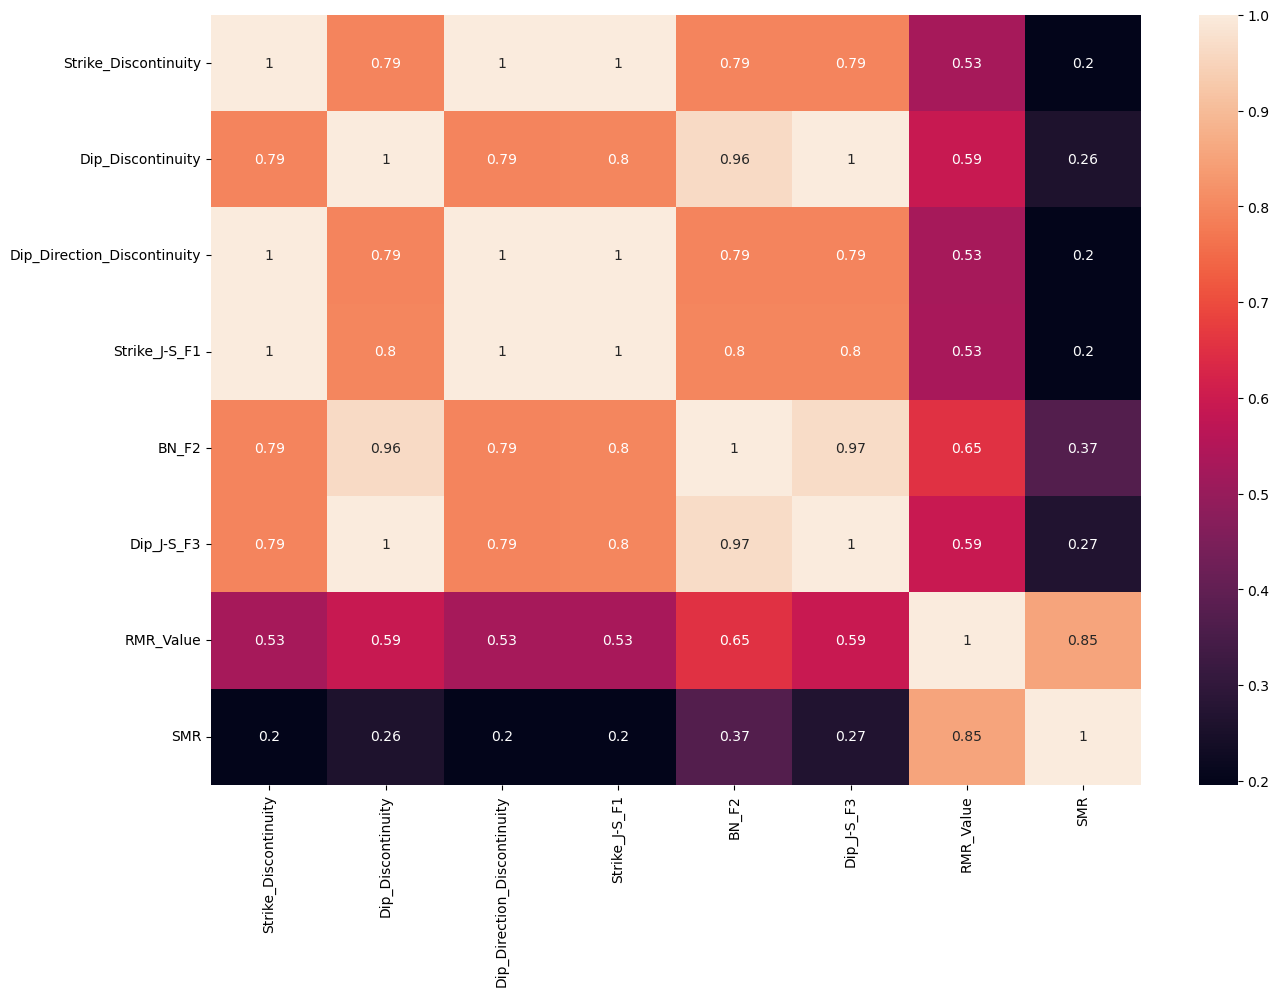

In [14]:
# This graph shows that, there is no column (Feature) which is highly co-related with 'Rasio'
plt.figure(figsize = (15,10))
sns.heatmap(data_direction_discontinuity_RMR_SMR.corr(), annot=True)
plt.show()

## Heatmap Condition Discontinuity with RMR and SMR

In [15]:
data_condition_discontinuity_RMR_SMR_nobn = data[['Joint_Spacing_Value(m)', 'Joint_Length_Value(m)', 'Joint_Aperture_Value',
                                             'RMR_Value', 'SMR']]
data_condition_discontinuity_RMR_SMR_nobn

,Joint_Spacing_Value(m),Joint_Length_Value(m),Joint_Aperture_Value,RMR_Value,SMR
0,0.6,4.00,0.3,72,68.25
1,1.5,0.60,0.1,76,72.25
2,0.7,1.50,0.0,80,76.25
3,0.4,0.50,0.0,77,73.25
4,0.4,0.50,0.0,77,73.25
5,1.3,0.11,0.0,82,78.25
6,1.7,4.00,0.0,74,70.25
7,1.8,0.10,0.0,82,78.25
8,0.2,22.00,0.0,67,68.00
9,0.9,22.00,0.0,72,72.00


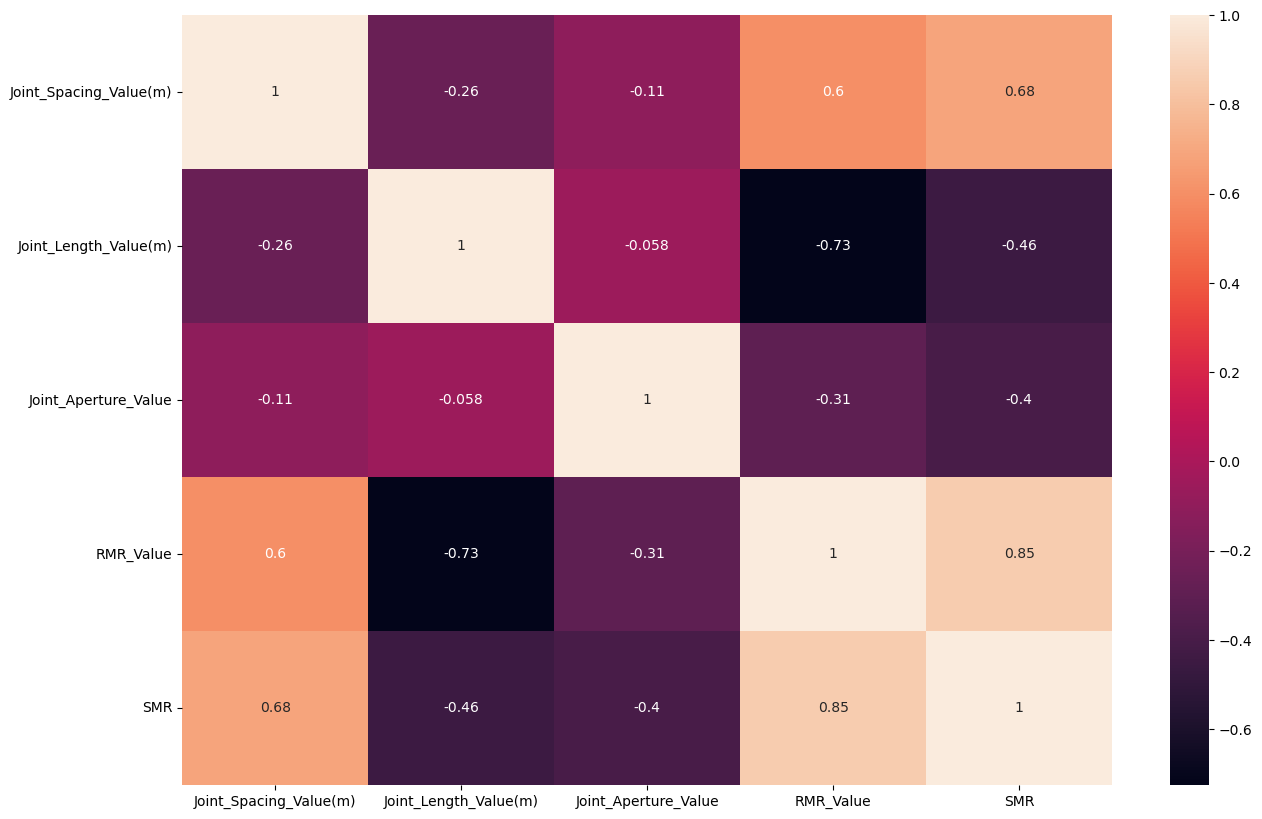

In [16]:
# This graph shows that, there is no column (Feature) which is highly co-related with 'Rasio'
plt.figure(figsize = (15,10))
sns.heatmap(data_condition_discontinuity_RMR_SMR_nobn.corr(), annot=True)
plt.show()

# Machine Learning Linear Regression

## Direction Discontinuities with RMR and SMR

### Strike Discontinuities vs RMR

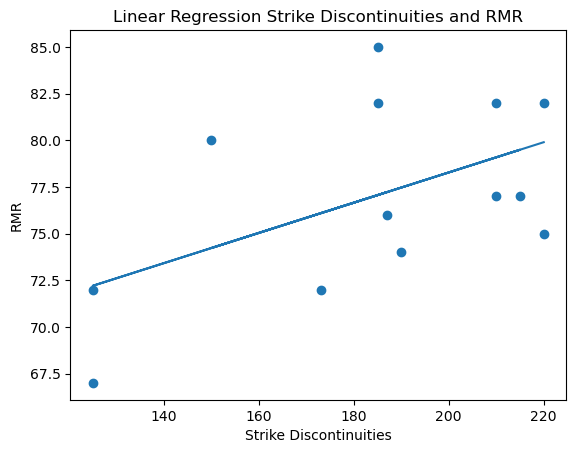

Relationship between Strike Discontinuities and RMR (R):  0.5264613491878297


In [17]:
x = data["Strike_Discontinuity"]
y = data["RMR_Value"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.title('Linear Regression Strike Discontinuities and RMR')
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel('Strike Discontinuities', size=10)
plt.ylabel('RMR', size=10)
plt.show()

print('Relationship between Strike Discontinuities and RMR (R): ', r)

### Strike Discontinuities vs SMR

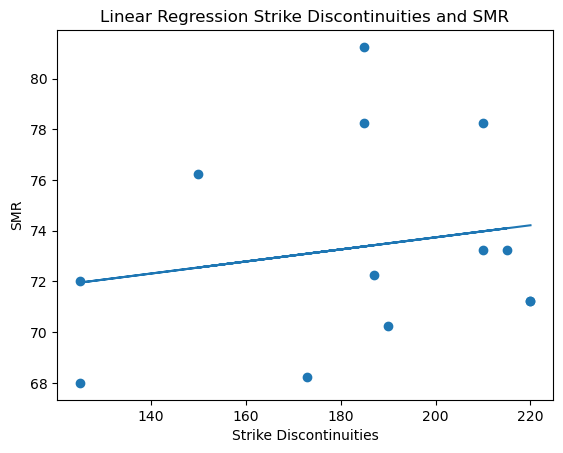

Relationship between Strike Discontinuities and SMR (R):  0.19590754217098294


In [18]:
x = data["Strike_Discontinuity"]
y = data["SMR"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.title('Linear Regression Strike Discontinuities and SMR')
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel('Strike Discontinuities', size=10)
plt.ylabel('SMR', size=10)
plt.show()

print('Relationship between Strike Discontinuities and SMR (R): ', r)

### Dip Direction Discontinuities vs RMR

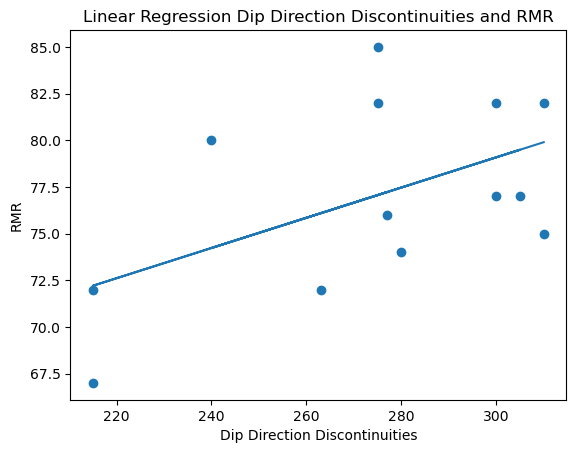

Relationship between Dip Direction Discontinuities and RMR (R):  0.5264613491878297


In [19]:
x = data["Dip_Direction_Discontinuity"]
y = data["RMR_Value"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.title('Linear Regression Dip Direction Discontinuities and RMR')
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel('Dip Direction Discontinuities', size=10)
plt.ylabel('RMR', size=10)
plt.show()

print('Relationship between Dip Direction Discontinuities and RMR (R): ', r)

### Dip Direction Discontinuities vs SMR

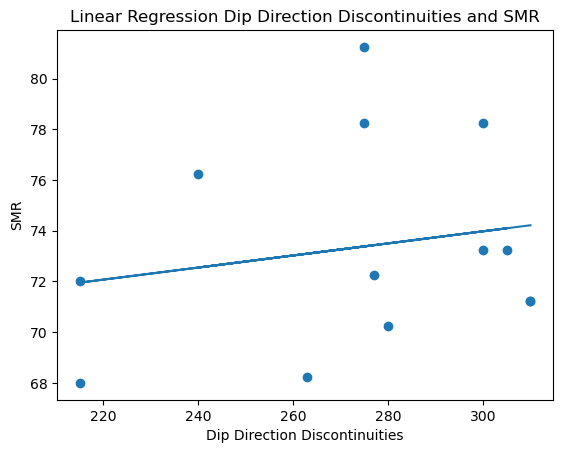

Relationship between Dip Direction Discontinuities and SMR (R):  0.19590754217098294


In [20]:
x = data["Dip_Direction_Discontinuity"]
y = data["SMR"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.title('Linear Regression Dip Direction Discontinuities and SMR')
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel('Dip Direction Discontinuities', size=10)
plt.ylabel('SMR', size=10)
plt.show()

print('Relationship between Dip Direction Discontinuities and SMR (R): ', r)

### Strike Joint-Slope (F1) vs RMR

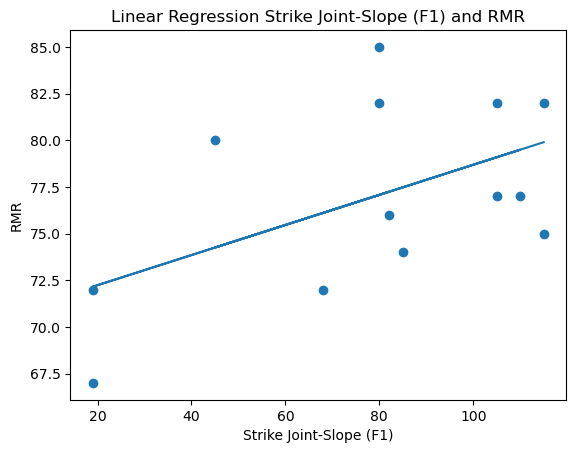

Relationship between Strike Joint-Slope (F1) and RMR (R):  0.5290912344473166


In [21]:
x = data["Strike_J-S_F1"]
y = data["RMR_Value"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.title('Linear Regression Strike Joint-Slope (F1) and RMR')
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel('Strike Joint-Slope (F1)', size=10)
plt.ylabel('RMR', size=10)
plt.show()

print('Relationship between Strike Joint-Slope (F1) and RMR (R): ', r)

### Strike Joint-Slope (F1) vs SMR

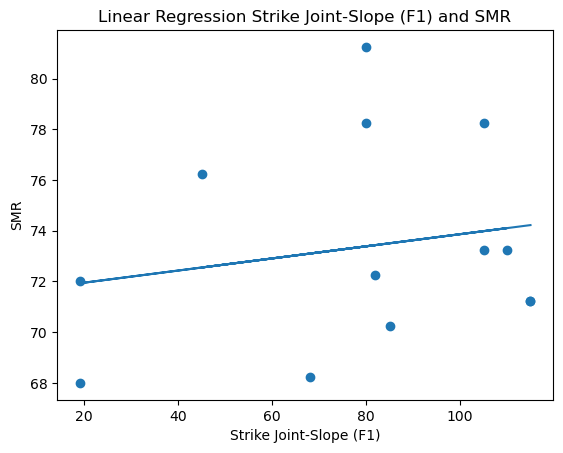

Relationship between Strike Joint-Slope (F1) and SMR (R):  0.19831909903389044


In [22]:
x = data["Strike_J-S_F1"]
y = data["SMR"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.title('Linear Regression Strike Joint-Slope (F1) and SMR')
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel('Strike Joint-Slope (F1)', size=10)
plt.ylabel('SMR', size=10)
plt.show()

print('Relationship between Strike Joint-Slope (F1) and SMR (R): ', r)

### Dip Joint-Slope (F3) vs RMR

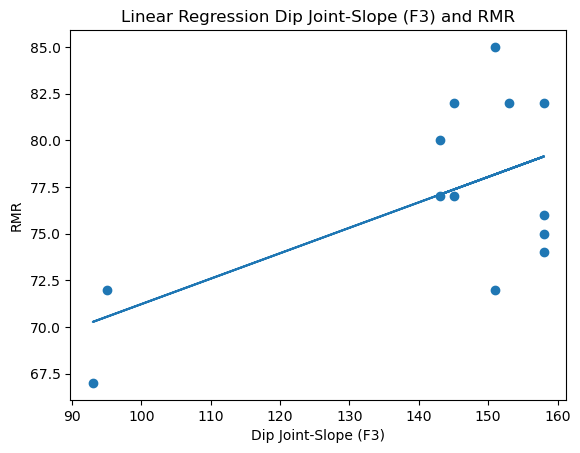

Relationship between Dip Joint-Slope (F3) and RMR (R):  0.5945084729122799


In [23]:
x = data["Dip_J-S_F3"]
y = data["RMR_Value"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.title('Linear Regression Dip Joint-Slope (F3) and RMR')
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel('Dip Joint-Slope (F3)', size=10)
plt.ylabel('RMR', size=10)
plt.show()

print('Relationship between Dip Joint-Slope (F3) and RMR (R): ', r)

### Dip Joint-Slope (F3) vs SMR

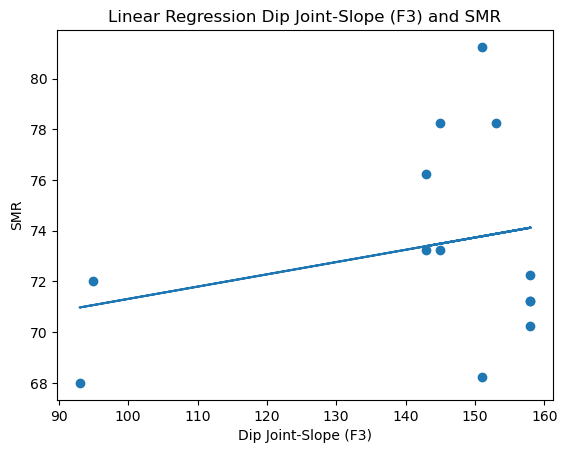

Relationship between Dip Joint-Slope (F3) and SMR (R):  0.26720507133473037


In [24]:
x = data["Dip_J-S_F3"]
y = data["SMR"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.title('Linear Regression Dip Joint-Slope (F3) and SMR')
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel('Dip Joint-Slope (F3)', size=10)
plt.ylabel('SMR', size=10)
plt.show()

print('Relationship between Dip Joint-Slope (F3) and SMR (R): ', r)

## Condition Discontinuities with RMR and SMR

### Joint Spacing vs RMR

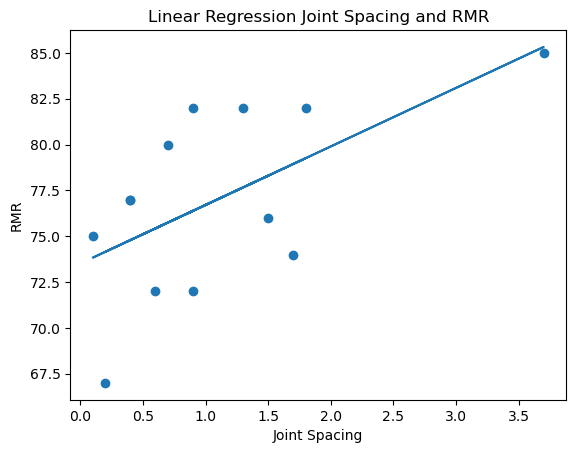

Relationship between Joint Spacing and RMR (R):  0.6018319701634053


In [25]:
x = data["Joint_Spacing_Value(m)"]
y = data["RMR_Value"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.title('Linear Regression Joint Spacing and RMR')
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel('Joint Spacing', size=10)
plt.ylabel('RMR', size=10)
plt.show()

print('Relationship between Joint Spacing and RMR (R): ', r)

### Joint Spacing vs SMR

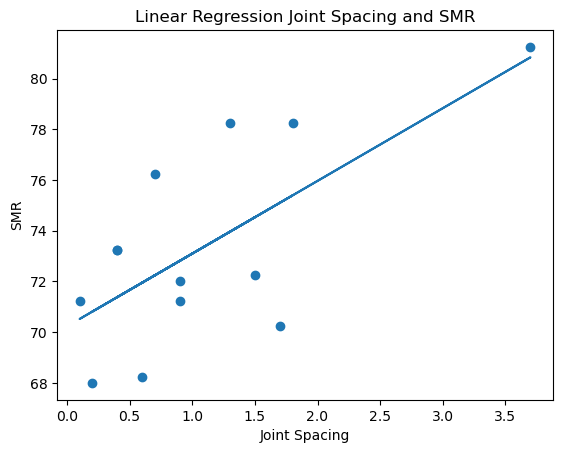

Relationship between Joint Spacing and SMR (R):  0.6836420433506105


In [26]:
x = data["Joint_Spacing_Value(m)"]
y = data["SMR"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.title('Linear Regression Joint Spacing and SMR')
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel('Joint Spacing', size=10)
plt.ylabel('SMR', size=10)
plt.show()

print('Relationship between Joint Spacing and SMR (R): ', r)

### Joint Length vs RMR

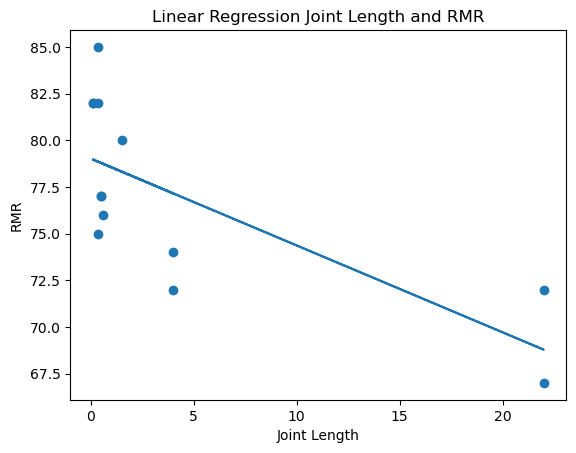

Relationship between Joint Length and RMR (R):  -0.7257340587522697


In [27]:
x = data["Joint_Length_Value(m)"]
y = data["RMR_Value"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.title('Linear Regression Joint Length and RMR')
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel('Joint Length', size=10)
plt.ylabel('RMR', size=10)
plt.show()

print('Relationship between Joint Length and RMR (R): ', r)

### Joint Length vs SMR

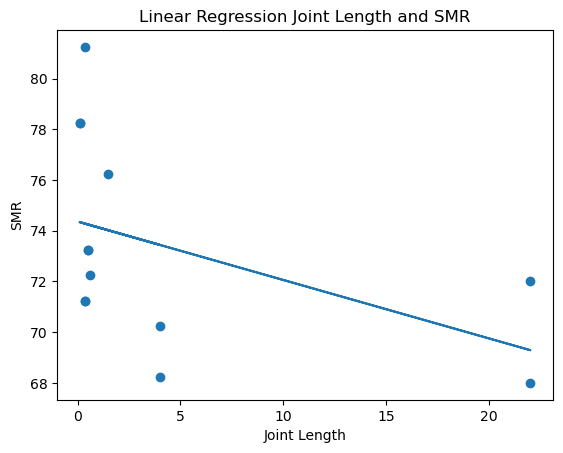

Relationship between Joint Length and SMR (R):  -0.4552900050091298


In [28]:
x = data["Joint_Length_Value(m)"]
y = data["SMR"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.title('Linear Regression Joint Length and SMR')
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel('Joint Length', size=10)
plt.ylabel('SMR', size=10)
plt.show()

print('Relationship between Joint Length and SMR (R): ', r)

### Joint Aperture vs RMR

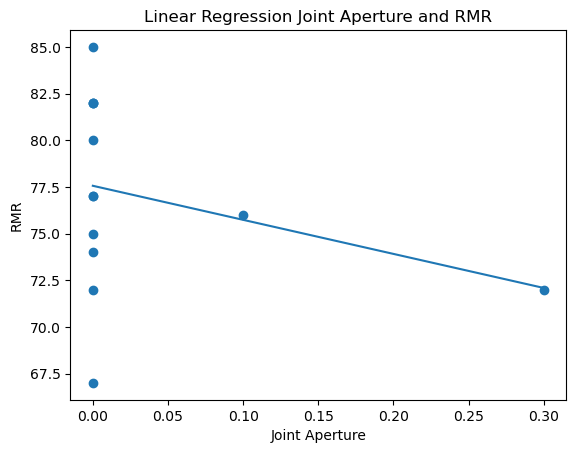

Relationship between Joint Length and RMR (R):  -0.30588764516074896


In [29]:
x = data["Joint_Aperture_Value"]
y = data["RMR_Value"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.title('Linear Regression Joint Aperture and RMR')
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel('Joint Aperture', size=10)
plt.ylabel('RMR', size=10)
plt.show()

print('Relationship between Joint Length and RMR (R): ', r)

### Joint Aperture vs SMR

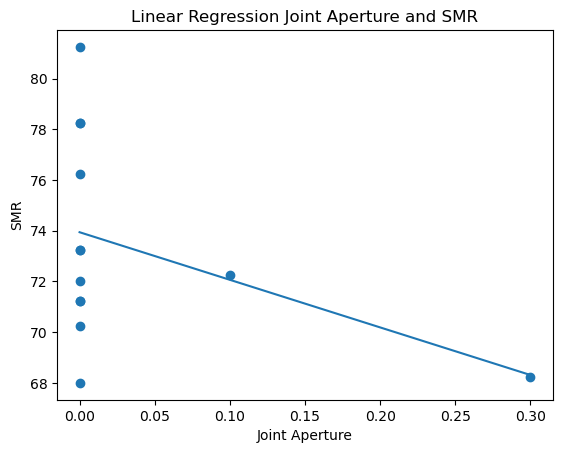

Relationship between Joint Length and SMR (R):  -0.39813092208511136


In [30]:
x = data["Joint_Aperture_Value"]
y = data["SMR"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.title('Linear Regression Joint Aperture and SMR')
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel('Joint Aperture', size=10)
plt.ylabel('SMR', size=10)
plt.show()

print('Relationship between Joint Length and SMR (R): ', r)